In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

### Data Processing

##### Load in Review data 

In [127]:
review = []
for line in open('review.json', 'r'):
    review.append(json.loads(line))

In [208]:
business_info = []
for line in open('business.json', 'r'):
    business_info.append(json.loads(line))

In [129]:
user_df = pd.read_csv('user.csv',names=['user id','# of funny votes','# of useful votes',' # of cool votes',' avg rating',' total review count'])
business_df = pd.read_csv('business.csv',header = None)

In [130]:
user_df.head()

,user id,# of funny votes,# of useful votes,# of cool votes,avg rating,total review count
0,14443,30,45,36,3.79,19
1,17782,5,24,9,3.90,10
2,13295,2,24,0,4.23,22
3,15187,0,7,0,4.00,9
4,16016,13,21,5,3.62,16


In [131]:
business_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,4584,1,4,5,6.0,7.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4222,1,4,10,11.0,12.0,13.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,4646,1,4,15,16.0,17.0,14.0,18.0,19.0,20.0,21.0,NaN,NaN,NaN
3,4137,1,4,22,23.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1100,1,4,15,24.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
review[0]

{'votes': {'funny': 0, 'useful': 5, 'cool': 2},
 'user_id': 'rLtl8ZkDX5vH5nAx9C3q5Q',
 'review_id': 'fWKvX83p0-ka4JS3dc6E5A',
 'stars': 5,
 'date': '2011-01-26',
 'text': 'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It wa

In [155]:
user_business_info = []
for i in review:
    user_business_info.append([i['user_id'],i['business_id'],i['stars']])

In [156]:
user_business_info[0]

['rLtl8ZkDX5vH5nAx9C3q5Q', '9yKzy9PApeiPPOUJEtnvkg', 5]

In [157]:
np.array(user_business_info).shape

(141454, 3)

In [9]:
def get_business_id(search_business_token):        
    df = pd.read_csv('business-lookup.csv',header = None)
    return df[df[1]==search_business_token][0].item()

In [10]:
get_business_id('FuykdWajbSDj0hBY5DIuZQ')

3998

In [197]:
def get_business_token(business_id):
    df = pd.read_csv('business-lookup.csv',header = None)
    return df[df[0]==business_id][1].item()

In [198]:
get_business_token(2683)

'OedV_QX8aD7MeLqshhWkCQ'

In [11]:
def get_user_id(search_user_token):
    df = pd.read_csv('user-lookup.csv',header=None)
    return df[df[1]==search_user_token][0].item()

In [12]:
get_user_id('rLtl8ZkDX5vH5nAx9C3q5Q')

10000

### Extract userid and businessid and other features to a list,array or pandas

In [158]:
userinfo = []
for i in user_business_info[:10000]: # Here to change the total size of dataset in training batch 
    userinfo.append([get_user_id(i[0]),get_business_id(i[1]),i[2]])

In [159]:
userinfo = np.asarray(userinfo)
userinfo

array([[10000,     0,     5],
       [10001,     1,     5],
       [10002,     2,     5],
       ...,
       [11324,  1848,     5],
       [13447,   140,     4],
       [10548,   961,     5]])

### Asign each column an unique number in the range of row length 

In [160]:
user_df = pd.DataFrame(userinfo,columns = ['userId','itemId','Rating'])
user_df['idxuserId'] = user_df['userId'].astype('category').cat.codes.values
user_df['idxitemId'] = user_df['itemId'].astype('category').cat.codes.values

In [161]:
user_df.head()

,userId,itemId,Rating,idxuserId,idxitemId
0,10000,0,5,0,0
1,10001,1,5,1,1
2,10002,2,5,2,2
3,10003,3,4,3,3
4,10004,4,5,4,4


In [ ]:
us

In [47]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(user_df, test_size=0.2)

In [48]:
train.head()

,userId,itemId,Rating,idxuserId,idxitemId
5383,13046,884,5,3046,884
8833,13739,310,5,3739,310
9785,10822,2556,3,822,2556
2293,10479,1463,5,479,1463
4585,11141,978,3,1141,978


import csv


with open('people1.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(row)

csvFile.close()

In [21]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
from keras.layers import merge
from keras.layers import Input, Embedding, Dot, Reshape, Dense
n_users, n_movies = len(userid[:,0]), len(userid[:,1])
n_latent_factors = 3

Using TensorFlow backend.


In [22]:
movie_input = keras.layers.Input(shape=[1],name='Business')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='Bussiness-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenBusiness')(movie_embedding)

user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input))

#prod = keras.layers.Merge([movie_vec, user_vec], mode='dot',name='DotProduct')
prod = Dot(name = 'dot_product', normalize = True, axes = 1)([movie_vec, user_vec])
model = keras.Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Business (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Bussiness-Embedding (Embedding) (None, 1, 3)         30003       Business[0][0]                   
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 3)         30003       User[0][0]                       
__________________________________________________________________________________________________
FlattenBus

In [49]:
history = model.fit([train['idxuserId'], train['idxitemId']], train['Rating'], epochs=100, verbose=0)

Text(0, 0.5, 'Train Error')

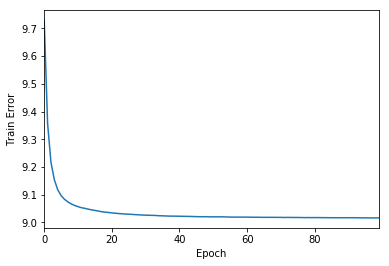

In [50]:
pd.Series(history.history['loss']).plot()#logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

In [52]:
y_hat = np.round(model.predict([test['idxuserId'], test['idxitemId']]),0)
y_true = test['Rating']

In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_hat)

2.9005

In [28]:
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

## Extract Embeddings and Analyze

In [54]:
# Extract embeddings
user_layer = model.get_layer('User-Embedding')
user_weights = user_layer.get_weights()[0]
user_weights.shape

(10001, 3)

#### We need to normalize the embeddings so that the dot product between two embeddings becomes the cosine similarity.

In [55]:
user_weights = user_weights / np.linalg.norm(user_weights, axis = 1).reshape((-1, 1))
user_weights[0]
np.sum(np.square(user_weights[0]))

0.99999994

In [56]:
user_weights

array([[ 0.8607518 , -0.36934888,  0.350268  ],
       [ 0.85697204, -0.372044  ,  0.35662606],
       [-0.40378234,  0.8991347 ,  0.16886844],
       ...,
       [-0.77083004,  0.4318783 , -0.46829697],
       [-0.9216849 , -0.00165379, -0.38793588],
       [-0.5095728 ,  0.1299537 ,  0.85055727]], dtype=float32)

### Top 5 closest Users

In [265]:
dists =np.dot(user_weights,user_weights[0]) # Calculate the similarity for first user in array
sorted_dists = np.argsort(dists) # sort the dists list return the least simlar user idx to closest 
sorted_dists[-5:] # Top 5 closest user'index

array([4374,  808,  397,    0, 2390], dtype=int64)

In [276]:
dists[4374],dists[808],dists[397],dists[0],dists[2390]

(0.99999917, 0.9999994, 0.9999996, 0.99999994, 1.0)

In [162]:
#get user's id through user index
def get_user_id_from_idx(user_idx):
    return user_df[user_df['idxuserId']== user_idx].iloc[0][0].item()

In [163]:
get_user_id_from_idx(0)

10000

In [164]:
def get_useridx_from_userid(userid):
    return user_df[user_df['userId']== userid].iloc[0][3].item()

In [165]:
get_useridx_from_userid(10000)

0

### Getting recommended businessid by closest user_index which ratings are greater than 3 

In [166]:
#get recommended_businessid by user_index
def get_recommended_businessid(user_idx,rating =3):
    ''' Given a user index return the businessid which rating greater than 3
        otherwise return rating smaller than 3'''
    a = np.array(user_df[user_df['idxuserId']== user_idx]) 
    if len(a[np.where(a[:,2]>=rating)][:,1]) != 0: # Get userid by user index than return the businessid which are greater than raing
        return a[np.where(a[:,2]>=rating)][:,1]
    elif len(a[np.where(a[:,2]>=rating)][:,1]) == 0: # if no business' rating greater than 3 return other business
        print("No business rating Greater than 3, but here are users that simlilary to you disliked business")
        return a[np.where(a[:,2]<=rating)][:,1]
                  

In [259]:
for i in get_recommended_businessid(0, rating =5):
    print(i)

0
2583
2263


In [207]:
get_business_token(2583)

'04Jrd2zSzwHwmBqdKQDmIw'

In [256]:
def get_business_info(business_id):
    '''Get business's information by business Id'''
    buslist = []
    if isinstance(business_id, (list, tuple, np.ndarray)) == True:
        for i in business_id:
            print(i)
            for a in range(0,len(business_info)):
                if business_info[a]['business_id']==get_business_token(i):
                    buslist.append(business_info[a])
                    return buslist
    else:
        for i in range(0,len(business_info)):
            if business_info[i]['business_id']==get_business_token(business_id):
                return business_info[i]

# There are 3 busID but only return first one?

In [257]:
get_business_info(get_recommended_businessid(0, rating =5))

0


[{'business_id': '9yKzy9PApeiPPOUJEtnvkg',
  'full_address': '6106 S 32nd St\nPhoenix, AZ 85042',
  'open': True,
  'categories': ['Breakfast & Brunch', 'Restaurants'],
  'city': 'Phoenix',
  'review_count': 116,
  'name': 'Morning Glory Cafe',
  'neighborhoods': [],
  'longitude': -112.012504,
  'state': 'AZ',
  'stars': 4.0,
  'latitude': 33.390792,
  'type': 'business'}]

In [260]:
isinstance(get_recommended_businessid(0, rating =5), (list, tuple, np.ndarray))

True

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 15

def find_similar(name, weights, index_name = 'userid', n = 10, least = False, return_dist = False, plot = False):
    """Find n most similar items (or least) to name based on embeddings. Option to also plot the results"""
    
    # Select index and reverse index
    #if index_name == 'userid':
    #    index = book_index
    #    rindex = index_book
    #elif index_name == 'businessid':
    #    index = link_index
    #    rindex = index_link
    
    # Check to make sure `name` is in index
    try:
        # Calculate dot product between book and all others
        dists = np.dot(weights, weights[get_useridx_from_userid(name)])
    except KeyError:
        print(f'{name} Not Found.')
        return
    
    # Sort distance indexes from smallest to largest
    sorted_dists = np.argsort(dists)
    
    # Plot results if specified
    if plot:
        
        # Find furthest and closest items
        furthest = sorted_dists[:(n // 2)]
        closest = sorted_dists[-n-1: len(dists) - 1]
        items = [rindex[c] for c in furthest]
        items.extend(rindex[c] for c in closest)
        
        # Find furthest and closets distances
        distances = [dists[c] for c in furthest]
        distances.extend(dists[c] for c in closest)
        
        colors = ['r' for _ in range(n //2)]
        colors.extend('g' for _ in range(n))
        
        data = pd.DataFrame({'distance': distances}, index = items)
        
        # Horizontal bar chart
        data['distance'].plot.barh(color = colors, figsize = (10, 8),
                                   edgecolor = 'k', linewidth = 2)
        plt.xlabel('Cosine Similarity');
        plt.axvline(x = 0, color = 'k');
        
        # Formatting for italicized title
        name_str = f'{index_name.capitalize()}s Most and Least Similar to'
        for word in name.split():
            # Title uses latex for italize
            name_str += ' $\it{' + word + '}$'
        plt.title(name_str, x = 0.2, size = 28, y = 1.05)
        
        return None
    
    # If specified, find the least similar
    if least:
        # Take the first n from sorted distances
        closest = sorted_dists[:n]
         
        print(f'{index_name.capitalize()}s furthest from {name}.\n')
        
    # Otherwise find the most similar
    else:
        # Take the last n sorted distances
        closest = sorted_dists[-n:]
        
        # Need distances later on
        if return_dist:
            return dists, closest
        
        
        print(f'{index_name.capitalize()}s closest to {name}.\n')
        
    # Need distances later on
    if return_dist:
        return dists, closest
    
    
    # Print formatting
    #max_width = max([len(rindex[c]) for c in closest])
    
    # Print the most similar and distances
    #for c in reversed(closest):
    #    print(f'{index_name.capitalize()}: {rindex[c]:{max_width + 2}} Similarity: {dists[c]:.{2}}')

In [264]:
find_similar(10000, user_weights,n=5)

Userids closest to 10000.

